- BaggingRegressor
- KNeighborsRegressor
- RandomForest Regressor
- AdaBoost Regressor

In [1]:
# libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [2]:
# read data
df = pd.read_csv('./data/data02_diabetes.csv')
X = df.iloc[:,:-1]
y = df['Y']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, random_state=1)

### Bagging Methods

In [3]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)

In [4]:
# usual knn
knn.fit(xtrain, ytrain)
print(knn.score(xtrain, ytrain), knn.score(xtest, ytest))

0.6447443202247629 0.30194445005036563


In [5]:
# full bagging
bf = BaggingRegressor(knn, n_estimators=100, max_samples=1.0, max_features=1.0, random_state=0)
bf.fit(xtrain, ytrain)
print(bf.score(xtrain, ytrain), bf.score(xtest, ytest))

0.673701636213444 0.34106207785208675


In [6]:
# bagging with subsampling and feature randomization
bf = BaggingRegressor(knn, n_estimators=500, max_samples=0.5, max_features=0.5)
bf.fit(xtrain, ytrain)
print(bf.score(xtrain, ytrain), bf.score(xtest, ytest))

0.5807868216584451 0.3662993186661605


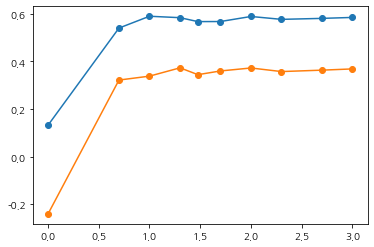

In [7]:
# effect of estimators
np.random.seed(0)
n_list = [1,5,10,20,30,50,100,200,500,1000]
s = np.zeros((len(n_list),2))
for i in range(len(n_list)):
    bf = BaggingRegressor(knn, n_estimators=n_list[i], max_samples=0.5, max_features=0.5)
    bf.fit(xtrain, ytrain)
    s[i,0] = bf.score(xtrain,ytrain)
    s[i,1] = bf.score(xtest,ytest)
plt.plot(np.log10(n_list),s,marker='o')

In [8]:
# parameter tunning
np.random.seed(1)
params = np.arange(2,20,2)
s = np.zeros((len(params),3))
for i in range(len(params)):
    f = BaggingRegressor(KNeighborsRegressor(params[i]), n_estimators=200,
                          random_state=0, max_samples=0.5, max_features=0.5, oob_score=True)
    f.fit(xtrain, ytrain)
    s[i,0] = f.score(xtrain, ytrain)
    s[i,1] = cross_val_score(f,xtrain, ytrain, cv=5).mean()

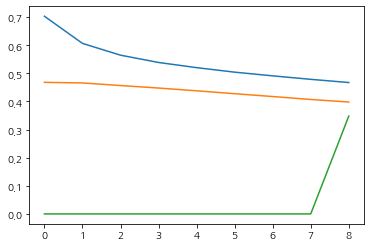

In [9]:
s[i,2] = f.score(xtest, ytest)
plt.plot(s)

### Random Forest Regressor

In [10]:
# random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0)
rf.fit(xtrain, ytrain)
yhat_test = rf.predict(xtest)
print(rf.score(xtrain, ytrain), rf.score(xtest, ytest))

0.9344222892222186 0.26652306720579266


In [11]:
# number of features to be chosen
rf = RandomForestRegressor(n_estimators=100, random_state=0, max_features='sqrt')
rf.fit(xtrain,ytrain)
print(rf.score(xtrain,ytrain), rf.score(xtest,ytest))

0.9307158003923464 0.32452479852142846


In [12]:
# tree size
rf = RandomForestRegressor(n_estimators=100, random_state=0,
                           max_features='sqrt', max_leaf_nodes=100)
rf.fit(xtrain,ytrain)
print(rf.score(xtrain, ytrain), rf.score(xtest, ytest))

0.934844542444828 0.3186232382873758


#### 참고
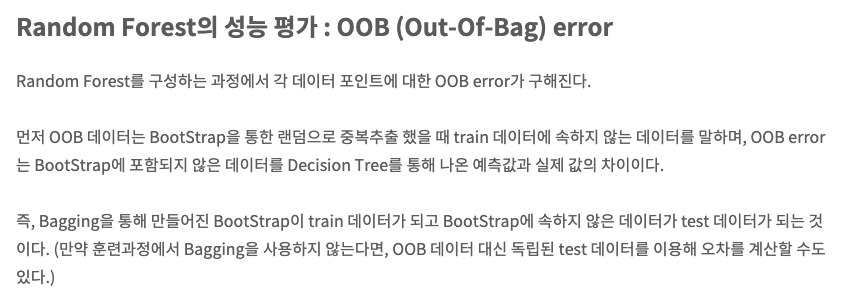

In [13]:
# oob score
rf = RandomForestRegressor(n_estimators=100,random_state=0,
                           max_features='sqrt',max_leaf_nodes=100,
                           oob_score=True)
rf.fit(xtrain,ytrain)
print(rf.score(xtrain,ytrain), rf.score(xtest,ytest))
print(rf.oob_score_)  # out-of-bag score

0.934844542444828 0.3186232382873758
0.5286735733070282


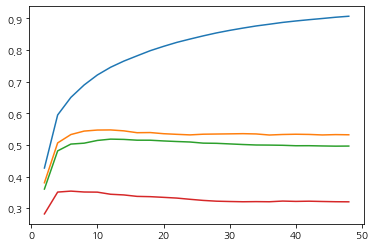

In [14]:
# parameter tuning using oob scores
tree_size = np.arange(2, 50, 2)
s = np.zeros((len(tree_size),4))

for i in range(len(tree_size)):
    rf = RandomForestRegressor(n_estimators=100, random_state=0,
                           max_features='sqrt', max_leaf_nodes=tree_size[i],
                           oob_score=True)
    rf.fit(xtrain,ytrain)
    s[i,0] = rf.score(xtrain,ytrain)
    s[i,1] = rf.oob_score_ 
    s[i,2] = cross_val_score(rf,xtrain,ytrain,cv=5).mean()
    s[i,3] = rf.score(xtest,ytest)

plt.plot(tree_size, s)

- 일정수준이 지나면 변함이 없음

### AdaBoost

- [참고](http://www.incodom.kr/Adaboost)

In [15]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=20)

In [16]:
# usual knn
knn.fit(xtrain,ytrain)
print(knn.score(xtrain,ytrain), knn.score(xtest,ytest))

0.5080959725354963 0.3876364359427341


In [19]:
# adaboost with knn
f = AdaBoostRegressor(knn, n_estimators=20, learning_rate=1, random_state=0)
f.fit(xtrain,ytrain)
print(f.score(xtrain,ytrain))
print(f.score(xtest,ytest))

0.5241872608426615
0.38040938090239296


In [20]:
# adaboost with tree
f = AdaBoostRegressor(None, n_estimators=10, learning_rate=1, random_state=0)
f.fit(xtrain,ytrain)
print(f.score(xtrain,ytrain))
print(f.score(xtest,ytest))

0.7099696568895637
0.31983289991227004


In [21]:
# parameter tuning
from sklearn.model_selection import GridSearchCV
model = AdaBoostRegressor()
parameters = {
    'base_estimator': [knn, None],
    'n_estimators': np.arange(2,200,2)
    }
f = GridSearchCV(model,parameters,cv=3)
f.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=AdaBoostRegressor(),
             param_grid={'base_estimator': [KNeighborsRegressor(n_neighbors=20),
                                            None],
                         'n_estimators': array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102, 104,
       106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128, 130,
       132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154, 156,
       158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182,
       184, 186, 188, 190, 192, 194, 196, 198])})

In [24]:
print(f.best_params_)
print(f.best_score_)
print(f.best_estimator_)

{'base_estimator': None, 'n_estimators': 16}
0.48222290773467097
AdaBoostRegressor(n_estimators=16)


In [25]:
print(f.score(xtrain, ytrain), f.score(xtest, ytest))

0.7267546488103471 0.2579615256474247
